# Greetings traveller! 
Welcome to Week 1 of the AIAP coursework. In the next 6 weeks, you will be *travelling* through the machine learning *space*, where we will be looking at various different machine learning problems and how to solve them. We will be taking a quick sweep through the many areas of analytics and machine learning, including learning about learning from data itself.

## Course Objectives

This course is designed to be different from the courses you have done previously. We acknowledge that there are lots of great free resources online, and are not trying to create yet another tutorial. Rather, we attempt to provide something that complements them, mirroring real-life problem solving. In general, we have the following goals out of the programme:
- __Finger-dipping exposure into ML__: we concede that six weeks are insufficient to fully understand ML, and we do not aim to do that. Rather, we would like to provide sufficient breadth in terms of practical, useful knowledge in the area.
- __Confidence to go further yourself__: the ML space is vast and expanding every day, no practitioner is ever sufficently trained to tackle any problem. Rather, good data scientists hone a sharp ability to learn new techniques to solve novel problems. We wish to build your confidence to go into the unknown, so that you can rely on yourself for learning beyond textbook knowledge.
- __Programming competency__: while we are not training software engineers, writing good, clean code is crucial to the success of any project that requires programming. We will provide guidance on how to write reproducible, human-centric code for data science that will pay dividends for a project in the long term.
- __Employability__: ultimately, we aim to help you get hired in the data science space, and we have crafted our notebooks to act like mock technical assessments in a safe space. The six week programme will equip you with critical soft skills for data science as well.

## Prerequisite Knowledge

This is certainly not a course for beginners. Considering that this will be a full-time, six-week programme, we have designed the course to be challenging in every aspect. Realistically, we would not expect anyone to be comfortable handling the course. Although the programme will be challenging, we wish to cultivate a forgiving, learning-based culture where necessary failure is celebrate encouraged and celebrated. Nevertheless, the following prerequisites will help you do well in this course:
- __Python, or general programming skills__: an ability to execute basic tasks beyond hello world in Python, or simply being comfortable with computer languages in general
- __Numerical programming__: an ability to execute mathematical scripts through a programming language like Python (it will be relatively easy to transition from Matlab, R, SAS or Julia)
- __Statistical fundamentals__: you should know how basic tools like linear and logistic regression work, and have a mathematical appreciation for it
- __Linear algebra and calculus__: basic mathematical knowledge will help you appreciate the algorithms and learn to use them better
- __A positive learning attitude__ most importantly, because realistically, no one will have all of the above, so we will all need to adapt and learn.

## Learning Resources 

At one or more points in time while attempting this notebook, you may find the following resources to be useful:
- Intro to Python Programming: [Python at PluralSight](https://app.pluralsight.com/paths/skills/python)*
- Numerical computing in Python: [Python for Data Science, 2nd Ed. by Wes McKinney](http://wesmckinney.com/pages/book.html)
- Random Forests in depth and from scratch: [fast.ai Machine Learning Course](https://course.fast.ai/ml)
- Organising your notebook: [initial steps toward reproducible research by Karl Broman](https://kbroman.org/steps2rr/)
- Finding specific methods in Pandas: [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
- All the answer keys you'll ever need: [Kaggle's Titanic Kernel](https://www.kaggle.com/c/titanic/kernels)

*You'll get free access to Pluralsight's Python track through your DataCamp subscription!

These are just recommended resources - do tap on anything you find useful, or approach us for alternative recommendations.

## Collaboration Policy

Collaboration is the best way to learn. In short, we should optimise learning - the general rule is to try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Be smart and flexible - do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we expect no plagurism or direct copying of code to occur.

Please list your collaborators:

In [ ]:
1. Delon Leonard

## Time Management

In this notebook, there will two main areas of focus: modelling, and model implementation (numerical programming). Different people will have different strengths, and our advice is to play to your strengths, and collaborate to learn from people who can teach you something, but offer something in return. Unless you are really good with everything the notebook needs you to do, __you are not likely to finish the notebook by doing it alone__.

For those who are very new to programming, it's okay to realise that you might not finish the notebook this week. If you are feel that you might not be ready to mix different technical fields together, considering spending more time building up your fundamentals instead - take your time if you need to. If you need more assistance, don't hesitate to speak to us!

Now, let's get into week one of the course! __Good luck, have fun.__

# 1. Initial Modelling 

Our problem this week is the el classico: the Titanic dataset, a dataset probably done to death by fellow travellers of the machine learning space. There is a reason why this dataset is so popular - it demands for all the fundamentals required of statistical modelling, while staying light in terms of technical demands. With just 891 rows of data, the problem can be solved on any laptop. While your laptop would not face much stress this week, we would recommend you to consider your technical set-up, so that as heavier datasets come about (in the size of GBs), you will not be limited by them.

First, go grab the data. The data is available at https://www.kaggle.com/c/titanic/data, you will need to register an account to retrieve it.

Since we are talking about downloading data, we should take this time to set up your folder. One such way (our recommended way) to do it as to create a project folder, then leave your notebooks in the root of that folder. Your code base, which we will be starting to build over time, should be in a `src` subfolder, while your data should be in a `data` folder, with a tree structure as shown:

```
aiap
 |- src
 |- data
 |   |- titanic.csv
 |   |- titanic_test.csv
 |- week1.ipynb
```

This is an opinionated format - we suggest this only for simplicity reasons.

Now, we are ready to do some coding work. First, import the necessary libraries you need.

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from pdpbox import pdp, get_dataset, info_plots
import numpy as np
from sklearn.ensemble import forest


...

Ellipsis

Import your data.

In [3]:
titanic_raw = pd.read_csv('./data/train.csv')

## Initial Model 

Train a stock random forest model (with no custom parameters and report the accuracy score). Do the __minimal__ cleaning required to let your model fit into the model. Using the `train_test_split` method, reserve some validation data for evaluation use.

You may see an accuracy of approximately 75% - this does not mean anything substantially, but it lets us know that a no-value-add approach to modelling will already generate this accuracy for us. Hence, our goal is to improve upon this current score, and reach as high as possible. For now, 75% is good enough for us to proceed.

In [7]:
rf = RandomForestClassifier()

print(titanic_raw.isna().sum())

titanic_EMnona = titanic_raw.dropna(axis = 0, subset = ['Age','Embarked'])
titanic_nona = titanic_EMnona.dropna(axis = 1)

titanic_nona_cat = titanic_nona.copy()
titanic_nona_cat['Sex'] = titanic_nona['Sex'].astype('category').cat.codes
titanic_nona_cat['Ticket'] = titanic_nona['Ticket'].astype('category').cat.codes
titanic_nona_cat['Embarked'] = titanic_nona['Embarked'].astype('category').cat.codes


titanic_drop = titanic_nona_cat.drop(['Name'],axis = 1)

train_set, test_set = train_test_split(titanic_drop, test_size = 0.2)


x_train = train_set.iloc[:,2:]
y_train = train_set.iloc[:,1]

x_test = test_set.iloc[:,2:]
y_test = test_set.iloc[:,1]

rf = rf.fit(x_train,y_train)

print(rf.score(x_test,y_test))




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0.8041958041958042


# 2. Exploring the data 

## Overall Dataset 

Conduct some initial exploration of this data. This could be through dataset level plots, correlation charts and table describes, as well as by understanding what kind of information is available, or not available (i.e. missing). Write a paragraph on what you observe in the data. There is no correct answer, but do present useful and insightful information as much as possible.

This part of the notebook should be helpful to someone who is trying to come into your project, but has no knowledge of the data. In complex, real-world problems, there may be multiple data sources, each with different structures of data. Making sense of data at this macro level may happen over several months in an iterative manner.

In [ ]:
The currently available features for survival predictability of Titanic are the Ticket class, Name, Sex, Age, Number of siblings/spouse on board, Number of parents/children on board, Ticket number, Fare, Cabin number and Embarkation port.

The target value is that of Survival which has a value of 1 for survived and a value of 0 for those who did not survive.

From the available features, Ticket class, Sex and Embarkation port are categorical data whereas Number of siblings/spouse and Number of parents/children are discrete values.

Additionally, Age and Fare are continuous values. Finally, Name consists of alphabets whereas Cabin consists of both numbers and alphabets.

On the surface, it will seem that Ticket class, Sex and Age will be important factors. This is because passengers who are more important or are female or are young should have priority in evacuation. However, the data for Age is not complete as 19.9% of the data is missing.





In [12]:
#Split dataset based on survival
P_Survive = titanic_raw.loc[titanic_raw['Survived'] == 1]
P_NSurvive = titanic_raw.loc[titanic_raw['Survived'] == 0]

## Individual Variables 

We now go deeper into individual variables. For each variable, provide plots, tables or descriptions that best capture the nuance of that column. There is no correct answer, but there is a gold standard.

Samples of this can be found in Kaggle's kernels page. While we value pretty charts, we value insights much more. Where insightful information is found, please indicate them in your notebook for your reader.

You may wish to strategically go deeper into variables you find more interesting. There is no need to scrutinize every variable.

### PassengerId

In [ ]:
PassengerID is in sequential order. Thus, it should not have any importance on passenger survival. There are a total of 891 passengers.

### Survived

In [ ]:
Survival value of 1 means survived whereas 0 means dead. There were 342 survivors and 549 dead. The difference in the two categories should not induce a large bias in the dataset.

### Pclass

In [8]:
Pclass may be important as the higher the class, the more important the passenger. Higher class passengers may be given priority during evacuation.

Out of the total of 891 passengers, 216 passengers were from Pclass 1, 184 passengers were from Pclass 2 and 491 passengers were from Pclass 3.

This is evidenced by the fact that the highest surivial rate (63.0%) was from Pclass 1, followed by Pclass 2 (47.3%) and lastly Pclass 3 (24.2%).

When the Pclass was further divided based on Age, it was observed that the lower classes (Pclass 2 and Pclass 3) form the majority of survivors from the age range of 0 to 20 whereas the highest class form the majority of survivors from the ages above 30. Between the age range of 20 to 30, the lowest class form the majority of the dead.

Pclass seems to be important and should be used as a feature.


SyntaxError: invalid syntax (<ipython-input-8-426c0395cd7d>, line 1)

In [11]:
print(titanic_raw[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


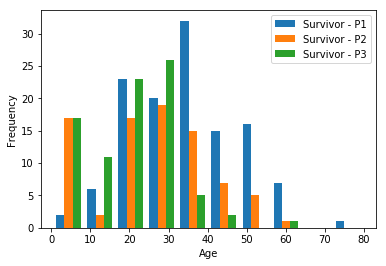

In [25]:
P_SurviveP1 = P_Survive.loc[titanic_raw['Pclass'] == 1]
P_SurviveP2 = P_Survive.loc[titanic_raw['Pclass'] == 2]
P_SurviveP3 = P_Survive.loc[titanic_raw['Pclass'] == 3]

n, bins, patches = plt.hist([P_SurviveP1['Age'].dropna(), P_SurviveP2['Age'].dropna(), P_SurviveP3['Age'].dropna()])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Survivor - P1', 'Survivor - P2', 'Survivor - P3'])
plt.show()

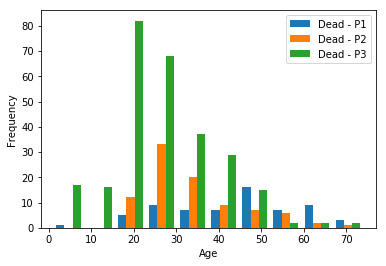

In [26]:
P_NSurviveP1 = P_NSurvive.loc[titanic_raw['Pclass'] == 1]
P_NSurviveP2 = P_NSurvive.loc[titanic_raw['Pclass'] == 2]
P_NSurviveP3 = P_NSurvive.loc[titanic_raw['Pclass'] == 3]

n, bins, patches = plt.hist([P_NSurviveP1['Age'].dropna(), P_NSurviveP2['Age'].dropna(), P_NSurviveP3['Age'].dropna()])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Dead - P1', 'Dead - P2', 'Dead - P3'])
plt.show()

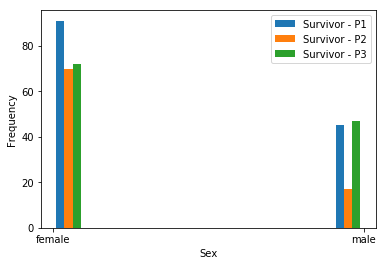

In [29]:
n, bins, patches = plt.hist([P_SurviveP1['Sex'].dropna(), P_SurviveP2['Sex'].dropna(), P_SurviveP3['Sex'].dropna()])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend(['Survivor - P1', 'Survivor - P2', 'Survivor - P3'])
plt.show()

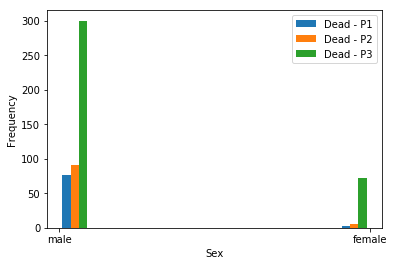

In [30]:
n, bins, patches = plt.hist([P_NSurviveP1['Sex'].dropna(), P_NSurviveP2['Sex'].dropna(), P_NSurviveP3['Sex'].dropna()])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend(['Dead - P1', 'Dead - P2', 'Dead - P3'])
plt.show()

### Name

In [ ]:
Name may be an important feature as it includes the title of the passenger. Certain titles may have higher social standing and thus may be evacuated first.

However, the majority of the passengers have very common titles such as Mr, Miss or Mrs and may not be that useful as a feature. It will have to be tested by re-running the model and checking for feature importance.

In [39]:
titanic_raw_title = titanic_raw.copy()
titanic_raw_title['Title'] = titanic_raw_title['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
title_unique = titanic_raw_title['Title'].value_counts()
print(title_unique)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
Don               1
Jonkheer          1
Mme               1
the Countess      1
Lady              1
Capt              1
Sir               1
Name: Title, dtype: int64


### Sex

In [ ]:
Sex may also be important as females were more likely to be evacuated as compared to males. 

There are a total of 577 males and 314 females.

A higher percentage of females (74.2%) survived as compared to males (18.9%).

Additionally, out of those who survived, 68.1% were females whereas 31.9% were males.

Sex should be used as a feature.

### Age

In [ ]:
Age is likely to be an important feature to predict survivability as it is likely that young children had priority during evacutation.

This is evident in the fact that the average age for those who survived was 28.3 which was lower than that of those who did not survive (30.6). Additionally, there seems to be an outlier in the data for those who survived as the maximum age for the surviving passengers was 80 years old. The average age for those who survived decreased to 28.2 after the 80 year old passenger was removed.

Furthermore, the histogram shows that it may be possible to classify the Age values into 3 groups. The groups are 0 to 20 years old, 20 to 40 years old and 40 years old to 80 years old.

Additionally, the histogram also shows that a large proportion of the dead were between 20 to 40 years old. When the survivors and the dead were further grouped by Sex, it was observed that a large proportion of the survivors were female between the ages of 20 to 40 years old. On the other hand, the majority of the dead were male between 20 to 40 years old. 

From the analysis, it seems that Age should be used as a feature.


Average Age of Survivors =  28.343689655172415
Average Age of Dead =  30.62617924528302


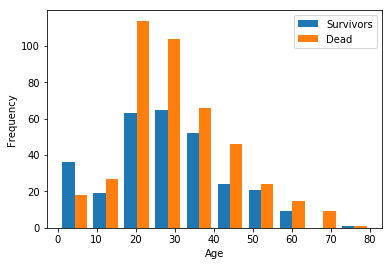

In [17]:
print('Average Age of Survivors = ', (P_Survive['Age']).mean())
print('Average Age of Dead = ', (P_NSurvive['Age']).mean())

n, bins, patches = plt.hist([P_Survive['Age'].dropna(), P_NSurvive['Age'].dropna()])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Survivors', 'Dead'])
plt.show()

In [19]:
P_SurviveM = P_Survive.loc[titanic_raw['Sex'] == 'male']
P_SurviveF = P_Survive.loc[titanic_raw['Sex'] == 'female']

P_NSurviveM = P_NSurvive.loc[titanic_raw['Sex'] == 'male']
P_NSurviveF = P_NSurvive.loc[titanic_raw['Sex'] == 'female']

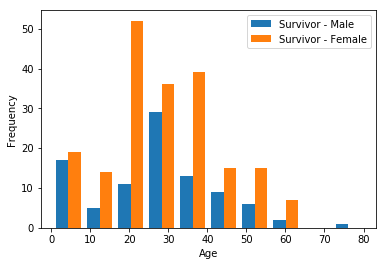

In [23]:
n, bins, patches = plt.hist([P_SurviveM['Age'].dropna(), P_SurviveF['Age'].dropna()])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Survivor - Male', 'Survivor - Female'])
plt.show()

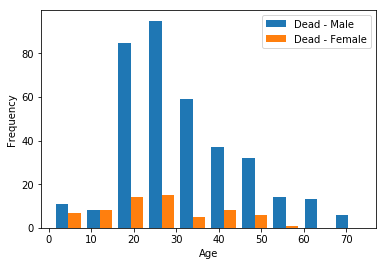

In [22]:
n, bins, patches = plt.hist([P_NSurviveM['Age'].dropna(), P_NSurviveF['Age'].dropna()])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Dead - Male', 'Dead - Female'])
plt.show()

### SibSp

In [ ]:
Number of siblings/spouse will be an indicator of how many people travelled alone or in a family.

It is possible to sum SibSp and Parch together to create a new feature for Number of family members.

From the Number of family members, it is also possible to determine if the passenger travelled alone. Another feature with 2 categories, Alone and Not Alone, can be created.



### Parch

In [ ]:
Number of parents/children will be an indicator of how many people travelled alone or in a family. Passengers with families may be less likely to survive as they may want to ensure that all members are safe and account for before leaving the ship.

### Ticket

In [ ]:
Based on a simple categorisation, Ticket number has a total of 681 different categories and this large number of categories to data point ratio may not be ideal for it to be a feature. 

However, it may be useful if it has a relationship with the location of the cabin. Additionally, it is likely that the passengers sharing the same ticket number are from a single family and this may affect survivalbility.

### Fare

In [ ]:
Fare may also be important as the higher the fare, the higher the likelihood that the passenger is more important.

As such, passengers with higher fares may be given priority to be evacuated.

The data also validates this hypothesis as the average fare for survivors (48.4) was larger than that for the dead (22.1).

As such, fares may be an important feature.

In [33]:
print('Average fare for Survivors = ', P_Survive['Fare'].mean())
print('Average fare for Dead = ', P_NSurvive['Fare'].mean())


Average fare for Survivors =  48.39540760233917
Average fare for Dead =  22.117886885245877


### Cabin

In [ ]:
Cabin number may also be an important feature because the location of the cabin with respect to where the ship collided with the iceberg may result in more deaths in the vicinity due to flooding.

However, the majority (77.1%) of the cabin data is missing. 

Additionally, the location of the cabins in the ship was also not available.

### Embarked

In [ ]:
At first glance, Embarked data does not seem useful as a feature.

Out of the 891 passengers, 77 embarked at Queenstown, 644 embarked at Southampton and 168 embarked at Cherbourg.

However, passengers who embarked at Cherbourg seem to have a much higher surivial rate (55.4%) as compared to Queenstown (39.0%) and Southampton (33.7%).

Thus, it may be a useful feature. It may also be possible to group Queenstown and Southampton into a single category as they have the same survival rate.

In [31]:
print(titanic_raw[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean())


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


## Overall Summary 

From your own exploration of the data, provide a few paragraphs in summary of the dataset. At this point, it may be helpful to provide a narrative which can reconstruct the situation aboard the titanic as it was sinking. This is also an opportunity to direct your attention towards areas where you feel information is raw and can be improved in your next section, through feature engineering.

Overall, it appears that some variables are more significant than others, but we would imagine that females and children, especially those who embarked at 'C' and are affluent, hence being able to pay for expensive tickets, will survive, while young men whom travelled alone with no kids or parents are most likely to have perished. 

In [ ]:
From the analysis above, it seems that the Sex, Ticket class and Age are important features. 

It is likely that passengers who were female, from a high passenger class and were young would be given pirority to be evacuated first. 
However, the Age data is not complete as 19.9% of the data is missing. Thus, it may be necessary to fill in the data using either the mean or median of a certain subset.
The subset may be dependent on the Sex, Ticket class and also Embarkation port. This is because there is a larger proportion of Males with missing Age (21.5%) as compared to Females (16.9%). Additionally, the majority of passengers with missing Age comes from the lowest Ticket class.

Additionally, while the data for Number of siblings/spouse and Number of parents/children may not be useful in the first instance, it can be combined to form other datsets such as Number of family members or whether the passenger travelled alone.

With regards to the Embarkation port, passengers who embarked at Cherbourg seem to have a much higher surivial rate as compared to the other ports. However, there are 2 missing data points which all belong to the Pclass 1. As such, it may be possible to fill in the missing points with the mode of the Embarkation port of passengers from Pclass 1.

It may be possible to link the Ticket number data together with the Cabin number to the location of the cabin which may help identify if passengers in certain cabins were more likely to survive.

As the average fares were higher for those who survive as compared to those who did not, it seems that fares may also be an important feature. However, the fares may also be reflective of the different Ticket class.

With regards to the Name data, the majority of the passengers have very common titles such as Mr, Miss or Mrs and may not be that useful as a feature.

# 3. Model Interpretation and Feature Engineering

In this section, we will begin by learning to appreciate the model interpretation methods related to decision trees and random forests. Please do some of your own research about these approaches. Then, we will move on to do some feature engineering - hopefully this will give us some information gain with respect to the dataset.

## Model Interpretation

### Feature importance
Plot a graph/table of feature importance of variables. Is there anything to be expected out of the data? Is there anything unexpected? Compare these findings with your teammate - are there any major differences in these plots?

In [ ]:
From the graph of feature importance, it is observed that Sex and Age are likely to be important features. This supports the earlier analysis.

However, it is interesting to note that Ticket number has the highest importance. This could be due to the way the ticket numbers were categorised earlier. There was a high category to number of data points ratio.

Additionally, it is also surprising that the Fare amount holds more importance as compared to the Passenger class. It could be due to the difference in nature of the data as Passenger class is categorical whereas Fare amount is a continuous dataset.

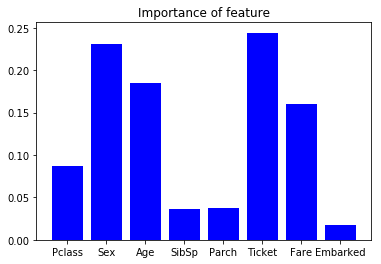

In [41]:
feature_importance = rf.feature_importances_
plt.figure()
plt.title("Importance of feature")
indices = [0,1,2,3,4,5,6,7]
x_indices = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
plt.bar(x_indices, feature_importance[indices],color="b",align="center")
plt.show()

### Partial Dependence 

Another useful interpretation plot is partial dependence. `sklearn` might not have a workable library out of the box, so one option would be to try `pdpbox`.

In [44]:
titanic_features = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']

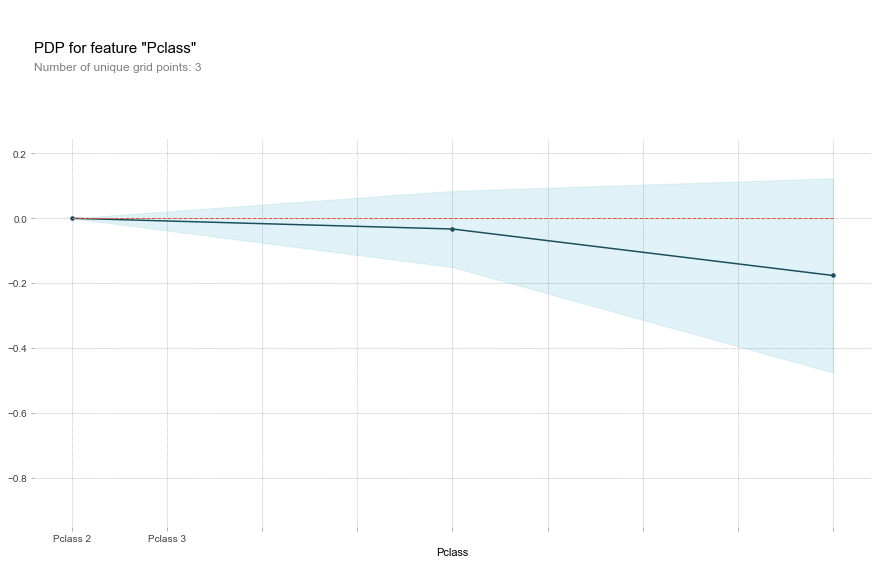

In [47]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Pclass')
fig, axes = pdp.pdp_plot(pdp_sex, 'Pclass')
_ = axes['pdp_ax'].set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'])

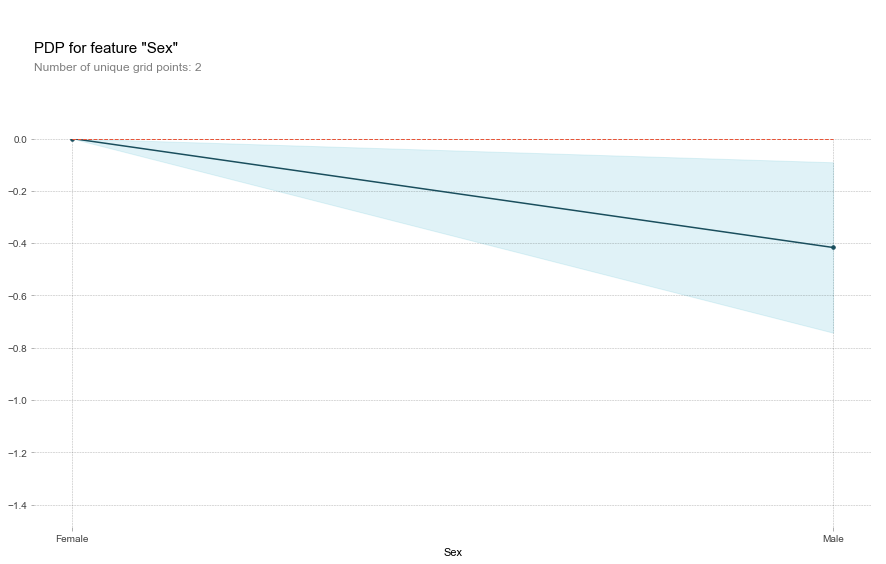

In [48]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Sex')
fig, axes = pdp.pdp_plot(pdp_sex, 'Sex')
_ = axes['pdp_ax'].set_xticklabels(['Female', 'Male'])

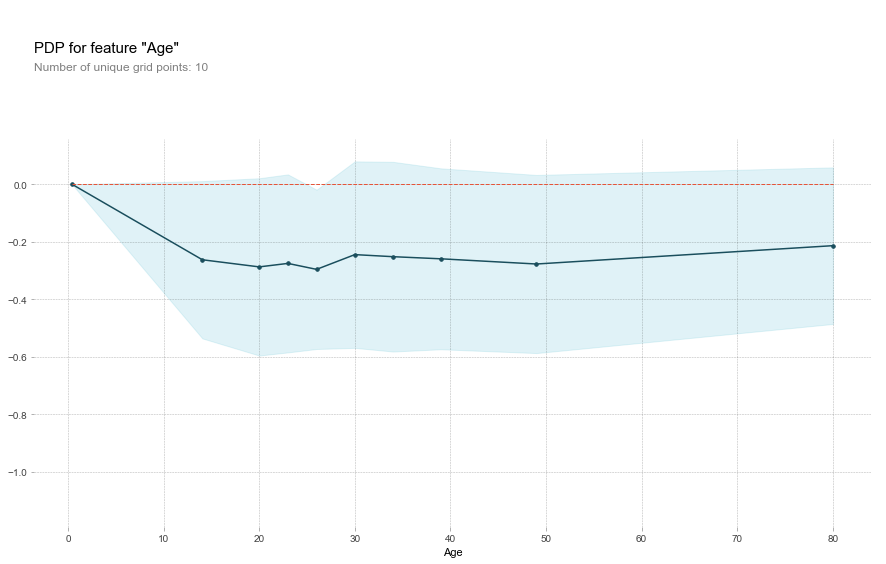

In [50]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Age')
fig, axes = pdp.pdp_plot(pdp_sex, 'Age')
_ = axes['pdp_ax']

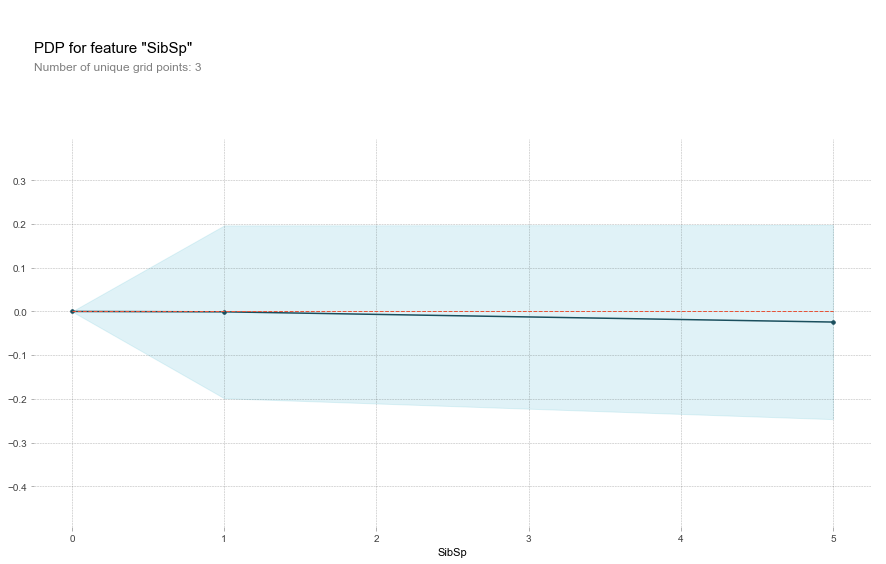

In [51]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='SibSp')
fig, axes = pdp.pdp_plot(pdp_sex, 'SibSp')
_ = axes['pdp_ax']

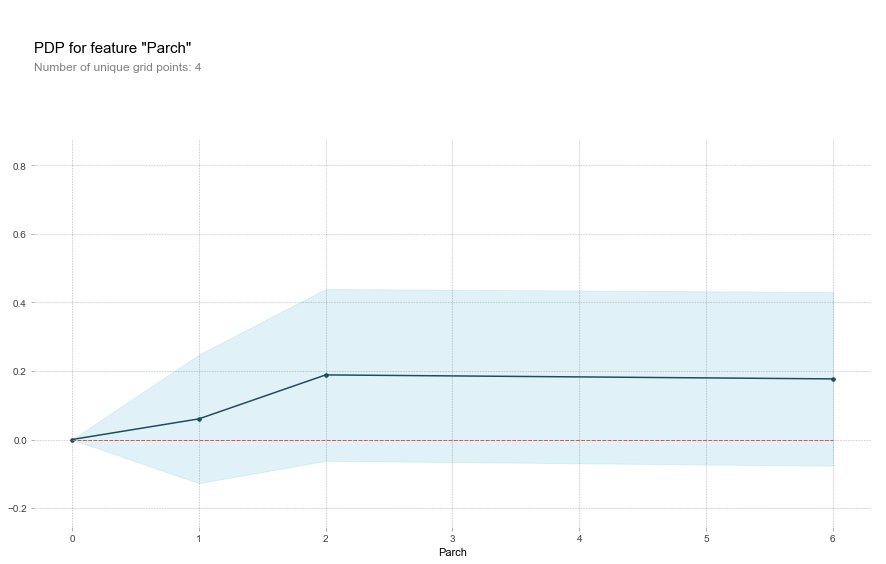

In [52]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Parch')
fig, axes = pdp.pdp_plot(pdp_sex, 'Parch')
_ = axes['pdp_ax']

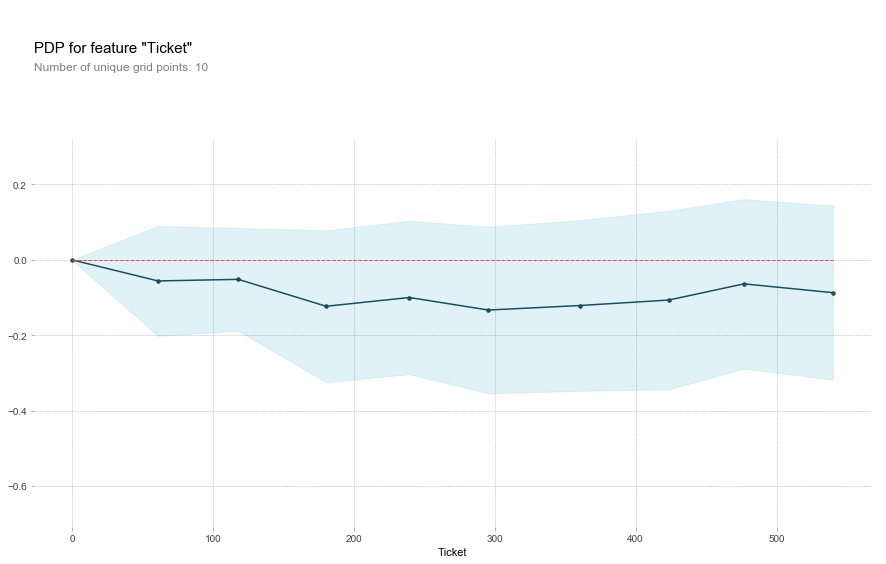

In [53]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Ticket')
fig, axes = pdp.pdp_plot(pdp_sex, 'Ticket')
_ = axes['pdp_ax']

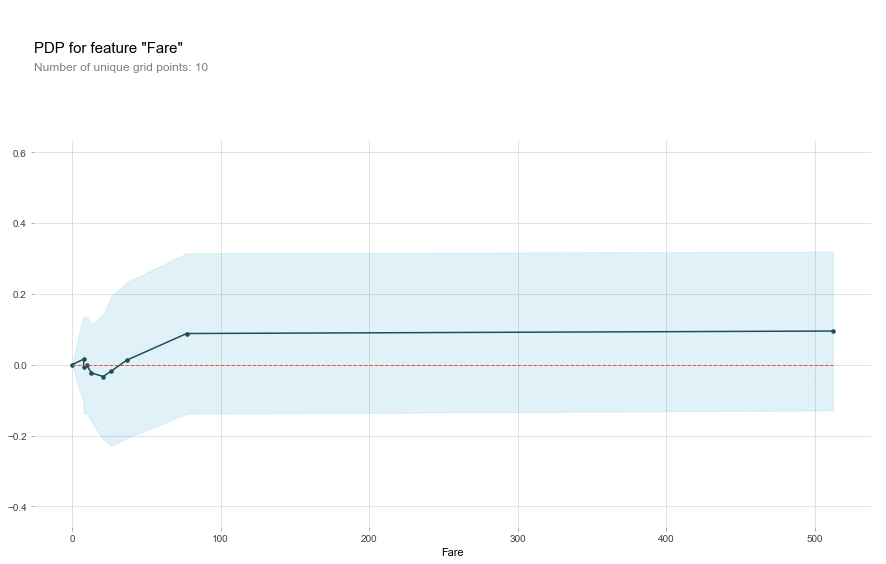

In [54]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Fare')
fig, axes = pdp.pdp_plot(pdp_sex, 'Fare')
_ = axes['pdp_ax']

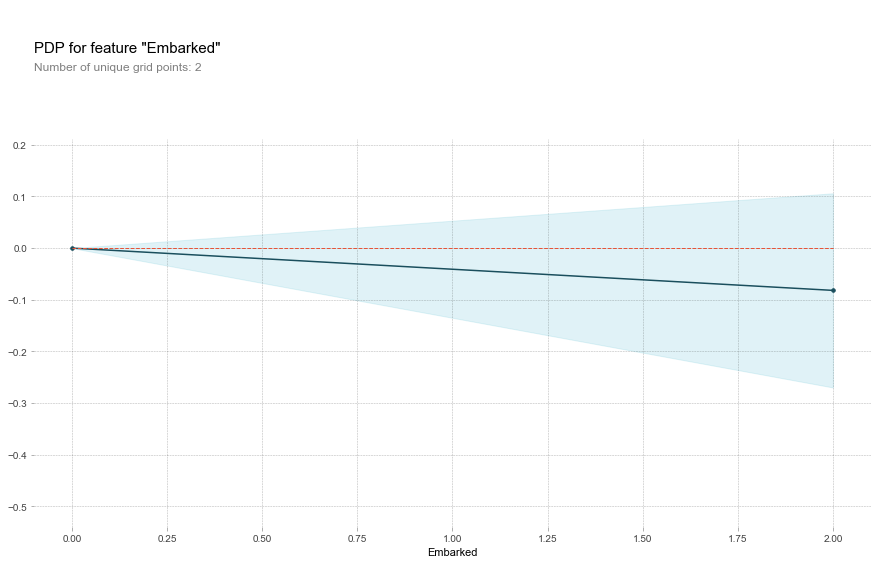

In [56]:
pdp_sex = pdp.pdp_isolate(model=rf, dataset=x_train, model_features=titanic_features, feature='Embarked')
fig, axes = pdp.pdp_plot(pdp_sex, 'Embarked')
_ = axes['pdp_ax']
#0 refers to C, 1 refers to Q and 2 refers to S

In [ ]:
The further away the main line is from 0, the more sensitive the model is to a change in the feature. Thus, from the plots above, it will seem that Parch may also be an important feature.

## Feature Engineering 

In this section, you should first briefly explain your thought process - what is good, what is lacking, and what are the potential areas of information the model has yet to exploit. Following which, do some feature engineering. After every engineered feature, re-run your model and observe if there is an improvement in scores.

Running your feature importance again at different points in time can help to validate if your variables are truly important, or are they simply collinear.

In [ ]:
Based on the data analysis above, the features that should be created are the Title, Number of family members and whether the passenger travelled alone. 

Additionally, missing data for Age and Embarkation port can also be filled in.

In [108]:
titanic_new = titanic_raw.copy()

titanic_new['Title'] = titanic_raw_title['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
title_mask = (titanic_new['Title'].value_counts() < 8)
print(title_mask)
titanic_new['Title'] = titanic_new['Title'].apply(lambda y: 'Others' if title_mask.loc[y] == True else y)

titanic_new['FMem'] = titanic_new['SibSp'] + titanic_new['Parch']

titanic_new['Alone'] = 1
titanic_new['Alone'].loc[titanic_new['FMem'] > 0] = 0

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Col              True
Major            True
Ms               True
Don              True
Jonkheer         True
Mme              True
the Countess     True
Lady             True
Capt             True
Sir              True
Name: Title, dtype: bool


In [105]:
Pclass_1 = titanic_new.loc[titanic_new['Pclass']== 1]
embark_fill = Pclass_1['Embarked'].mode()[0]
titanic_new['Embarked'].fillna(embark_fill, inplace=True)

In [106]:
#Pclass_2 = titanic_new.loc[titanic_new['Pclass']== 2]
#Pclass_3 = titanic_new.loc[titanic_new['Pclass']== 3]
#titanic_new.loc[titanic_new['Pclass']== 2].fillna(Pclass_2['Age'].median(), inplace=True)

#print(titanic_new.isna().sum())

mask1M = (titanic_new['Pclass'] == 1) & (titanic_new['Sex'] == 'male')
P1M_filler = titanic_new.loc[mask1M, 'Age'].median()
titanic_new.loc[titanic_new['Age'].isnull() & mask1M, 'Age'] = P1M_filler

mask1F = (titanic_new['Pclass'] == 1) & (titanic_new['Sex'] == 'female')
P1F_filler = titanic_new.loc[mask1F, 'Age'].median()
titanic_new.loc[titanic_new['Age'].isnull() & mask1F, 'Age'] = P1F_filler

mask2M = (titanic_new['Pclass'] == 2) & (titanic_new['Sex'] == 'male')
P2M_filler = titanic_new.loc[mask2M, 'Age'].median()
titanic_new.loc[titanic_new['Age'].isnull() & mask2M, 'Age'] = P2M_filler

mask2F = (titanic_new['Pclass'] == 2) & (titanic_new['Sex'] == 'female')
P2F_filler = titanic_new.loc[mask2F, 'Age'].median()
titanic_new.loc[titanic_new['Age'].isnull() & mask2F, 'Age'] = P2F_filler

mask3M = (titanic_new['Pclass'] == 3) & (titanic_new['Sex'] == 'male')
P3M_filler = titanic_new.loc[mask3M, 'Age'].median()
titanic_new.loc[titanic_new['Age'].isnull() & mask3M, 'Age'] = P3M_filler

mask3F = (titanic_new['Pclass'] == 3) & (titanic_new['Sex'] == 'female')
P3F_filler = titanic_new.loc[mask3F, 'Age'].median()
titanic_new.loc[titanic_new['Age'].isnull() & mask3F, 'Age'] = P3F_filler

print(titanic_new.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FMem             0
Alone            0
dtype: int64


# 4. Model Re-Training and Fine-Tuning

## Model Re-Training

When you are confident of your variables, re-run your model with all your variables again, and observe your feature importance. At times having extra variables may even deprove scores. You may also wish to remove features that show insignificant partial dependence. 

How much accuracy did these engineered features give? How important were these features? At this point in time, you may wish to talk to your peers and identify features they came up with (original ones, not those taken from the internet). This is a stage where brainstorming and contextual knowledge is extremely helpful.

In [107]:
rf2 = RandomForestClassifier()

titanic_nona2 = titanic_new.dropna(axis = 1)

print(titanic_nona2.isna().sum())

titanic_nona_cat2 = titanic_nona2.copy()
titanic_nona_cat2['Sex'] = titanic_nona2['Sex'].astype('category').cat.codes
titanic_nona_cat2['Ticket'] = titanic_nona2['Ticket'].astype('category').cat.codes
titanic_nona_cat2['Embarked'] = titanic_nona2['Embarked'].astype('category').cat.codes
titanic_nona_cat2['Title'] = titanic_nona2['Title'].astype('category').cat.codes

titanic_drop2 = titanic_nona_cat2.drop(['Name'],axis = 1)

train_set2, test_set2 = train_test_split(titanic_drop2, test_size = 0.2)

print(train_set2.head())

x_train2 = train_set2.iloc[:,2:]
y_train2 = train_set2.iloc[:,1]

x_test2 = test_set2.iloc[:,2:]
y_test2 = test_set2.iloc[:,1]


rf2 = rf2.fit(x_train2,y_train2)

print(rf2.score(x_test2,y_test2))


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
FMem           0
Alone          0
dtype: int64
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
556          557         1       1    0  48.0      1      0      57  39.6000   
188          189         0       3    1  40.0      1      1     435  15.5000   
525          526         0       3    1  40.5      0      0     446   7.7500   
710          711         1       1    0  24.0      0      0     582  49.5042   
504          505         1       1    0  16.0      0      0       0  86.5000   

     Embarked  Title  FMem  Alone  
556         0      4     1      0  
188         1      2     2      0  
525         1      2     0      1  
710         0      4     0      1  
504         2      1     0      1  
0.8044692737430168


## Model Tuning - Good for presentation

Finally, we should do some model tuning. We previously ran a "default" model, with no customization inside our RandomForestClassifier model. However, if we were to look at the parameters, we'll see that there are many you can change.

In [53]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Evidently, there are many variables worth checking out. For now, some of the most salient ones are `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. These are in general, all parameters we tweak to decrease overfitting. Try tuning these parameters, plotting a graph of model accuracy against parameter variation for each variable.

Other useful parameters are `oob_score`, which serves as a validation set of unsampled data points during the bootstrap, and `n_jobs`, which parallelises the process. We recommend you set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up your training process.
<br /><br />
<font color=red>This is not a prerequisite per se, but at this point, you should try to understand the bootstrapping concept. After all, this single concept gave rise to random forests and many other statistical methods we know today!</font>

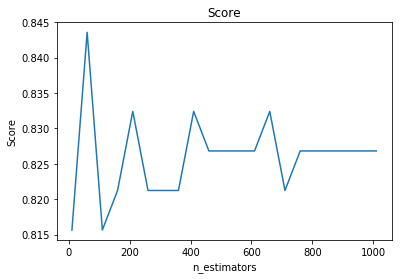

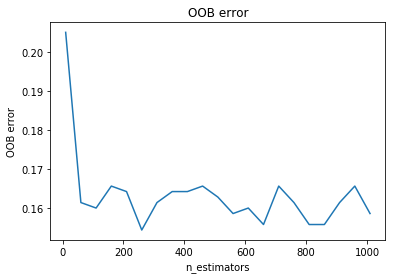

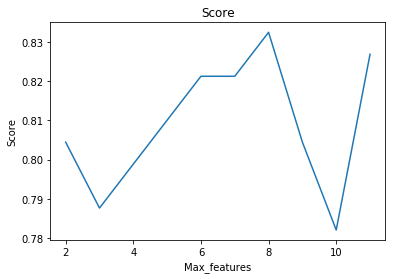

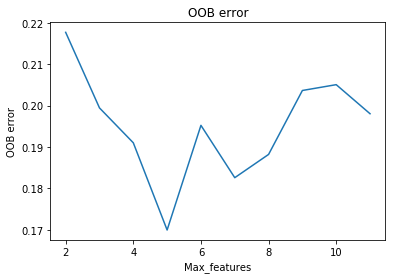

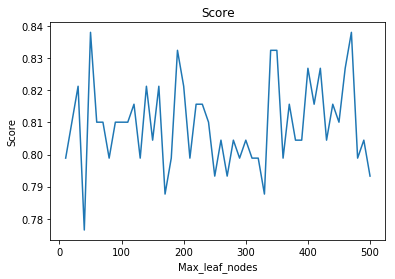

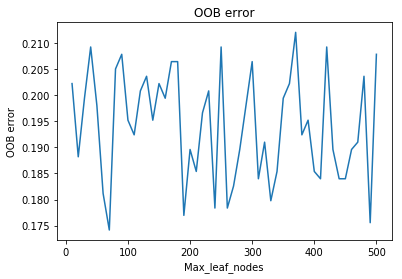

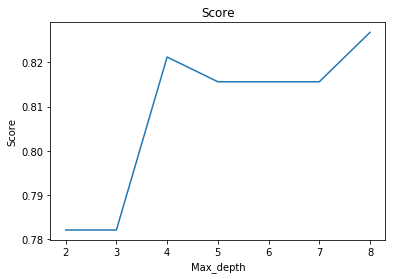

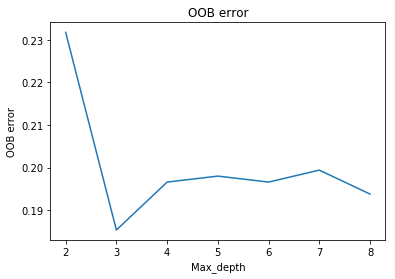

Best n_estimators =  260
Best Max_features =  5
Best Max_leaf_nodes =  70
Best Max_depth =  3


In [126]:
score_md = []
score_ml = []
score_mf = []
score_ne = []

oob_md = []
oob_ml = []
oob_mf = []
oob_ne = []

md = []
ml = []
mf = []
ne = []

for ii in range(10,1050,50):
    ne.append(ii)
    rf3 = RandomForestClassifier(n_estimators=ii,oob_score=True,n_jobs=-1)
    rf3 = rf3.fit(x_train2,y_train2)
    score_ne.append(rf3.score(x_test2,y_test2))
    oob_ne.append(1 - rf3.oob_score_)
    
for jj in range(2,12,1):
    mf.append(jj)
    rf4 = RandomForestClassifier(max_features=jj,oob_score=True,n_jobs=-1)
    rf4 = rf4.fit(x_train2,y_train2)
    score_mf.append(rf4.score(x_test2,y_test2))
    oob_mf.append(1 - rf4.oob_score_)
    
for kk in range(10,510,10):
    ml.append(kk)
    rf5 = RandomForestClassifier(max_leaf_nodes=kk,oob_score=True,n_jobs=-1)
    rf5 = rf5.fit(x_train2,y_train2)
    score_ml.append(rf5.score(x_test2,y_test2))
    oob_ml.append(1 - rf5.oob_score_)
    
for ll in range(2,9,1):
    md.append(ll)
    rf6 = RandomForestClassifier(max_depth=ll,oob_score=True,n_jobs=-1)
    rf6 = rf6.fit(x_train2,y_train2)
    score_md.append(rf6.score(x_test2,y_test2))
    oob_md.append(1 - rf6.oob_score_)
    
    
plt.plot(ne,score_ne)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Score')
plt.show()

plt.plot(ne,oob_ne)
plt.xlabel('n_estimators')
plt.ylabel('OOB error')
plt.title('OOB error')
plt.show()

plt.plot(mf,score_mf)
plt.xlabel('Max_features')
plt.ylabel('Score')
plt.title('Score')
plt.show()

plt.plot(mf,oob_mf)
plt.xlabel('Max_features')
plt.ylabel('OOB error')
plt.title('OOB error')
plt.show()

plt.plot(ml,score_ml)
plt.xlabel('Max_leaf_nodes')
plt.ylabel('Score')
plt.title('Score')
plt.show()

plt.plot(ml,oob_ml)
plt.xlabel('Max_leaf_nodes')
plt.ylabel('OOB error')
plt.title('OOB error')
plt.show()

plt.plot(md,score_md)
plt.xlabel('Max_depth')
plt.ylabel('Score')
plt.title('Score')
plt.show()

plt.plot(md,oob_md)
plt.xlabel('Max_depth')
plt.ylabel('OOB error')
plt.title('OOB error')
plt.show()
    
print('Best n_estimators = ', ne[oob_ne.index(min(oob_ne))])
print('Best Max_features = ', mf[oob_mf.index(min(oob_mf))])
print('Best Max_leaf_nodes = ', ml[oob_ml.index(min(oob_ml))])
print('Best Max_depth = ', md[oob_md.index(min(oob_md))])

### Subsampling 

The `fastai` library has a very cool method called `set_rf_samples`, which sets the number of subsamples we use in each tree we initalize. For more information, you may refer [here on stackoverflow](https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec). You might wish to play with this variable, as it can give you some improved performance.

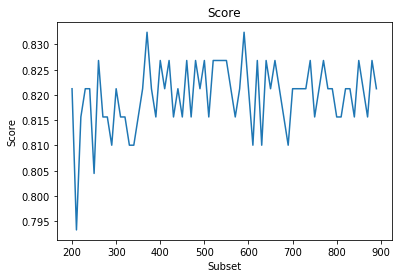

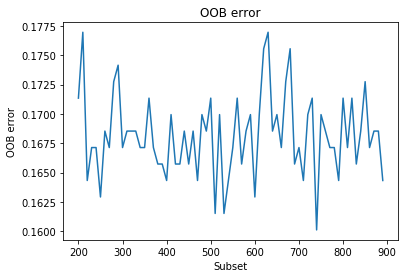

Best Subset =  740


In [132]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))
    
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

oob_subset = []
score_subset = []
subset = []
for ii in range(200,900,10):
    set_rf_samples(ii)
    subset.append(ii)
    rf7 = RandomForestClassifier(n_estimators=260,max_features=5,max_leaf_nodes=70,max_depth=3,oob_score=True,n_jobs=-1)
    rf7 = rf7.fit(x_train2,y_train2)
    score_subset.append(rf7.score(x_test2,y_test2))
    oob_subset.append(1 - rf7.oob_score_)
    reset_rf_samples()

plt.plot(subset,score_subset)
plt.xlabel('Subset')
plt.ylabel('Score')
plt.title('Score')
plt.show()

plt.plot(subset,oob_subset)
plt.xlabel('Subset')
plt.ylabel('OOB error')
plt.title('OOB error')
plt.show()

print('Best Subset = ', subset[oob_subset.index(min(oob_subset))])

### Cross Validation (Optional)

If we think about what we do with validation, we're actually taking a portion (20%) of our data out of our training set for validation purposes. This means that we are sacrificing training data (and hence predictive power) to create a less overfitted, more generalised model. There is a trade-off for our model: we remove overfitting (variance) by sacrificing predictive power (increasing bias). This is known as the bias variance trade-off, which we will go into more detail next week.

We will go into details next week, but in short, this can be avoided using cross validation. If you have done this before, you may use cross validation to improve the model here. Report your accuracy.

Otherwise, if we know all the validation scores for all our models, simply pick the best model in terms of validation score. Report your accuracy. 

Put back all our data into one big training set, and re-train the model using this training set. You can now make a prediction on your test set, and submit your result to Kaggle!

In [167]:
x_train3 = titanic_drop2.iloc[:,2:]
y_train3 = titanic_drop2.iloc[:,1]

reset_rf_samples()
set_rf_samples(740)

rf8 = RandomForestClassifier(n_estimators=260,max_features=5,max_leaf_nodes=70,max_depth=3,oob_score=True,n_jobs=-1)
rf8 = rf8.fit(x_train3,y_train3)

titanic_test = pd.read_csv('./data/test.csv')

#print(titanic_test.info())
titanic_test_title = titanic_test.copy()

titanic_test['Title'] = titanic_test_title['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
titanic_test['Title'] = titanic_test['Title'].apply(lambda y: y if y in ['Mr','Miss','Mrs','Master'] else 'others')

titanic_test['FMem'] = titanic_test['SibSp'] + titanic_test['Parch']

titanic_test['Alone'] = 1
titanic_test['Alone'].loc[titanic_test['FMem'] > 0] = 0

titanic_test['Embarked'].fillna(embark_fill, inplace=True)

#titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)
maskP1 = (titanic_new['Pclass'] == 1)
P1_filler = titanic_new.loc[maskP1, 'Fare'].mean()
maskP2 = (titanic_new['Pclass'] == 2)
P2_filler = titanic_new.loc[maskP2, 'Fare'].mean()
maskP3 = (titanic_new['Pclass'] == 3)
P3_filler = titanic_new.loc[maskP3, 'Fare'].mean()

maskTP1 = (titanic_test['Pclass'] == 1)
titanic_test.loc[titanic_test['Fare'].isnull() & maskTP1, 'Fare'] = P1_filler

maskTP2 = (titanic_test['Pclass'] == 2)
titanic_test.loc[titanic_test['Fare'].isnull() & maskTP2, 'Fare'] = P2_filler

maskTP3 = (titanic_test['Pclass'] == 3)
titanic_test.loc[titanic_test['Fare'].isnull() & maskTP3, 'Fare'] = P3_filler

maskT1M = (titanic_test['Pclass'] == 1) & (titanic_test['Sex'] == 'male')
titanic_test.loc[titanic_test['Age'].isnull() & maskT1M, 'Age'] = P1M_filler

maskT1F = (titanic_test['Pclass'] == 1) & (titanic_test['Sex'] == 'female')
titanic_test.loc[titanic_test['Age'].isnull() & maskT1F, 'Age'] = P1F_filler

maskT2M = (titanic_test['Pclass'] == 2) & (titanic_test['Sex'] == 'male')
titanic_test.loc[titanic_test['Age'].isnull() & maskT2M, 'Age'] = P2M_filler

maskT2F = (titanic_test['Pclass'] == 2) & (titanic_test['Sex'] == 'female')
titanic_test.loc[titanic_test['Age'].isnull() & maskT2F, 'Age'] = P2F_filler

maskT3M = (titanic_test['Pclass'] == 3) & (titanic_test['Sex'] == 'male')
titanic_test.loc[titanic_test['Age'].isnull() & maskT3M, 'Age'] = P3M_filler

maskT3F = (titanic_test['Pclass'] == 3) & (titanic_test['Sex'] == 'female')
titanic_test.loc[titanic_test['Age'].isnull() & maskT3F, 'Age'] = P3F_filler

titanic_test['Sex'] = titanic_test['Sex'].astype('category').cat.codes
titanic_test['Ticket'] = titanic_test['Ticket'].astype('category').cat.codes
titanic_test['Embarked'] = titanic_test['Embarked'].astype('category').cat.codes
titanic_test['Title'] = titanic_test['Title'].astype('category').cat.codes

titanic_predict = titanic_test.drop(['Name','Cabin'],axis = 1)

x_predict = titanic_predict.iloc[:,1:]

p_id = titanic_test['PassengerId'].values
y_predict = rf8.predict(x_predict)

predictions=pd.DataFrame({'PassengerId':p_id,'Survived':y_predict})

predictions.to_csv('data/submission.csv', index=False)

[0.1199111  0.41793586 0.05110848 0.02546225 0.00674392 0.07417098
 0.1034322  0.01028257 0.13662304 0.05040813 0.00392147]


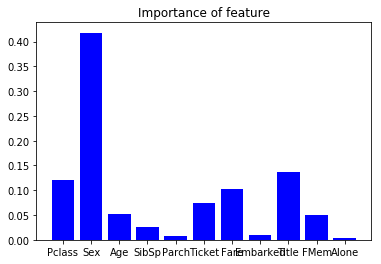

In [168]:
print(rf8.feature_importances_)
feature_importance = rf8.feature_importances_
plt.figure()
plt.title("Importance of feature")
indices = [0,1,2,3,4,5,6,7,8,9,10]
x_indices = ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked','Title','FMem','Alone']
plt.bar(x_indices, feature_importance[indices],color="b",align="center")
plt.show()

### Submission

What is your Kaggle leaderboard performance? Please provide your Kaggle username as well. We hope you have had a prediction accuracy of at least 78%, but it's okay if you don't.

In [ ]:
predictions[['PassengerId', 'Survived']].to_csv('data/submission.csv', index=False)

In [ ]:
# Accuracy: 0.78468
# Kaggle name: Daniel Ng

## Future Improvements

Not all models are perfect, especially not in the constraint of time. Do some research on the models that do better than you, and list out the areas that you can improve on in the long run. Prioritise these improvements and spell out how you can implement them if they are non-trivial to implement.

- Ensembling/stacking instead of using a single RF model
- Trying different classifiers to get better fillers for NaN values (For example: Fares can be grouped together by passenger class)

# 5. Building your Random Forest from Scratch

Congratulations! You have completed the tutorial on random forests... not!

Apart from modelling, each week, you will also be expected to implement the models we are using. After all, the best way to learn is to implement from scratch. AI Apprentices are not only expected to model, but also do the necessary engineering for real life problems, and many such problems require custom code. For example, we may want to use subsampling to improve our model performance, but edge-cutting methods would not yet be available in common libraries. When this happens, you will have to address these problems yourself.

Numerical programming might be new to some, if you did not come from the R/Matlab side of things. To get yourself up to speed with numerical programming in Python, we highly recommend Wes McKinney's [Python for Data Analysis, 2nd Ed.](https://www.safaribooksonline.com/library/view/python-for-data/9781491957653/)

__Note__: In this guided implementation, we made 2 decisions, firstly to use a Python `class`, i.e. object oriented programming (arguably so at least), and secondly to use the `numpy` library. Neither of these decisions are compulsory - if you have prior experience in another style, or using alternative libraries, feel free to do so, and modify the script to allow your code to run. However, if you have no prior experience, we suggest sticking to this format - we will follow `scikit-learn`'s format, which we believe is increasingly an industry standard.

## Decision Trees 

A random forest, as the the name suggests, is made up of many decision trees, each with levels of variation and randomness. Before looking at random forests, we will look at understanding what decision trees do.

Decision trees, more specifically Classification and Regression Trees (CARTs), are an algorithm/data structure that learns to split data out based on rules it learns. There are many resources out there to get a good understanding of what CARTs are, which you may wish to reference while accomplishing the tasks here.

### Gini Criterion

If you remember from `get_params`, there exists a parameter `criterion: 'gini'`. This means that the tree is using Gini as a criterion to decide how to separate the data.

Hence, we will first learn how to use the Gini impurity score. The Gini impurity score of a node n is given as:  

<center>$i(n) = 1 - p^2_0 - p^2_1$,  </center>  

Where $p_1$ refers to the proportion of 1's in that node, and $p_0$ refers to the proportion of 0's.

In [ ]:
from src.decision_tree import DecisionTree

For the above line of code to work, you will have to do the following if you haven't done so:
1. Create a folder called src at the directory of your current notebook
2. Create a __init__.py empty file in the src folder -see http://mikegrouchy.com/blog/2012/05/be-pythonic-__init__py.html
3. Create a file, `decision_tree.py`. You can consider the terminal script `touch decision_tree.py`
4. create a class `DecisionTree` inside `deicison_tree.py`

You may realise that for this part of the coursework, we are not writing code directly into Jupyter notebooks, but inside the /src/ folder as `.py` files. We are maintaining a code base, outside of the Jupyter notebook. We do this for two reasons - 1) because this code is highly reusable in future sessions, beyond the scope of one notebook. 2) because such code bases are collaboration-friendly, as Git and Jupyter notebooks do not play well with each other, but python files do. In the future, non-exploratory code will be written in teams, so scripts would be a more collaboration friendly format. The `src/` folder structure is a very basic and light introduction to this, but in short, each project should have a different folder structure to cater to its needs.

In [ ]:
def approx_eq(a, b, num_sig=5):
    return round(a, num_sig) == round(b, num_sig)

In [ ]:
approx_eq(DecisionTree().gini([1, 0, 0, 0, 0], [1, 1, 1, 1, 0]), .32)
# for the above line of code to work,
# 1. create a method gini that takes in 2 arrays and computes the node's gini impurity
# 2. implement the method as per the mathematical formula given
# 3. if you would like to turn this into a private method, make the necessary adjustments
# -> DecisionTree()._DecisionTree__gini()

### fit(X_train, y_train)

Following sklearn's `fit` and `predict`/`score` approach to programming, we will be implementing the fit and predict methods. First, we will attempt to implement a fit method.

The fit method will take in 2 numpy matrices: a m\*n train array with m training examples of n features, and a m\*1 array of labels.

There are tons of resources available to describe the workings of a CART. We would encourage you to find a source that best suits your needs, but we have picked out two points which other resources may miss at the implementation stage. Feel free to find more resources to expand on these areas:

1. The CART is a recursive tree structure. Every node of the tree can be seen as a decision tree node. When it splits, its left and right branches and its child nodes. When fitting a tree, you should recursively fit the nodes of the tree, in a way that the fitting can be used to predict in the future.

2. In finding the best condition to split the variables, it is alright to iterate through every single unique value of every variable, and determine the best condition through the iterations. The best condition can be defined as the one that provides the most __information gain__, which is defined as the greatest loss in Gini impurity.

If this is your first time doing object oriented programming in Python, we would high recommend you expose yourself to some Python resources first, or read the Python documentation. __If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
# read a new csv and remove complicated columns
titanic = pd.read_csv('data/titanic.csv')
X_cols = titanic.columns
X_cols = X_cols.drop('Age')
X_cols = X_cols.drop('Cabin')
X_cols = X_cols.drop('Name')
X_cols = X_cols.drop('Ticket')
titanic = titanic[X_cols]

# one hot encoding for remainining multiclass columns
titanic['Sex_m'] = (titanic['Sex'] == 'male').astype('int')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S').astype('int')
titanic['Embarked_C'] = (titanic['Embarked'] == 'C').astype('int')
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)

# create X and y, test and train
X_cols = titanic.columns
X_cols = X_cols.drop('Survived')
X_titanic = titanic[X_cols]
y_titanic = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, random_state=99)

In [ ]:
dt = DecisionTree()

In [ ]:
dt.fit(X_train.values, y_train.values)

### predict(X_test)

If you have designed your `fit` method well, predict method will be naturally easy. If the node is a leaf, simply return the leaf value. If the node is not a leaf, call predict on one of its child nodes depending on whether it fits the condition.

__If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
preds_dt = dt.predict(X_test.values)
sum(preds_dt == y_test)/len(y_test)

## Random Forests

Now that we have a decision tree, we can build a random forest, comprising of decision trees of randomised bootstraps of our dataset. At the simplest level, a random forest can be simply a list of decision trees that take a vote on the outcome of the prediction. This list can be an attribute of the random forest.

The basic modification of random forests is the use of bootstrapping. Bootstrapping is done in a few lines of code through `np.random.choice`.

Hence, to begin, build a simple random forest, that will initialise 5 trees through bootstrapping (sampling 100% with replacement), and predict the answer through a voting mechanism out of all the 5 trees. For computational efficiency, we recommend using `np.stack` and `np.array.mean`.

In [ ]:
rf_0 = RandomForest()
rf_0.fit(X_train.values, y_train.values)
preds_rf = rf_0.predict(X_test.values)
sum(preds_rf == y_test)/len(y_test)

Next, we will implement `n_trees` to be tweakable. In addition, we will have a `subsample_size` parameter, which does the subsampling that the sklearn's random forest could not do. We can continue to use `np.random.choice`, but if subsample_size > 1, we can sample without replacement instead. (Or you could have another parameter to adjust that too.)

In [ ]:
rf_1 = RandomForest(n_trees=10, subsample_size=0.8)
rf_1.fit(X_train.values, y_train.values)
preds_rf1 = rf_1.predict(X_test.values)
sum(preds_rf1 == y_test)/len(y_test)

Finally, we will implement the `feature_proportion` feature, which refers to the number of features we allow each tree to use. This further increases the randomness and eliminates overfitting.

In [ ]:
rf_2 = RandomForest(n_trees=100, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

You may wish to attempt to implement other optional parameters of random forest. One important parameter is `max_features` which makes the tree lose some features at every node, or `max_depth`, which limits the number of levels the tree can have. However, we chose to leave these out, as they require tweaking at the decision tree level, which is an exercise left for your own choice.

__Congratulations!__ You have finally come to the end of the week 1. Hope you had as much fun as we had building it!

<img src="https://www.ambitiouskitchen.com/wp-content/uploads/2014/03/glutenfreecookies-6.jpg" />